# Species file

This notebook shows how to use the `ReaxSpecies` class in order to read 
the output files
produced by the `reaxff/species` fix of LAMMPS.

In [1]:
from pyreax.reax_species import ReaxSpecies
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9)

## Load data

In [2]:
rs = ReaxSpecies("../test_files/species.out")

The `data` table contains for each time step (one row) the number of 
molecules. If the molecule does not exist at the current time step, 
`NaN` is returned.

In [3]:
rs.data.head()

No_moles  No_Specs  C100 H202  C15 H31  C85 H171  C14 H29  C33 H67  \
TimeStep                                                                       
20001           10         1       10.0      NaN       NaN      NaN      NaN   
40001           10         1       10.0      NaN       NaN      NaN      NaN   
60001           10         1       10.0      NaN       NaN      NaN      NaN   
80001           10         1       10.0      NaN       NaN      NaN      NaN   
100001          10         1       10.0      NaN       NaN      NaN      NaN   

          C67 H135  C86 H173  C100 H201  ...  C7 H12  C21 H44  C26 H53  \
TimeStep                                 ...                             
20001          NaN       NaN        NaN  ...     NaN      NaN      NaN   
40001          NaN       NaN        NaN  ...     NaN      NaN      NaN   
60001          NaN       NaN        NaN  ...     NaN      NaN      NaN   
80001          NaN       NaN        NaN  ...     NaN      NaN      NaN   
100001         NaN       NaN        NaN  ...     NaN      NaN      NaN   

          C6 H10  C6 H8  C7 H16  C23 H49  C6 H7  C6 H9  C9 H11  
TimeStep                                                        
20001        NaN    NaN     NaN      NaN    NaN    NaN     NaN  
40001        NaN    NaN     NaN      NaN    NaN    NaN     NaN  
60001        NaN    NaN     NaN      NaN    NaN    NaN     NaN  
80001        NaN    NaN     NaN      NaN    NaN    NaN     NaN  
100001       NaN    NaN     NaN      NaN    NaN    NaN     NaN  

[5 rows x 167 columns]

`molecules` attribute contains the name of all molecules which exist at
one time in the simulation. It corresponds to all the columns of the above
table.

In [4]:
rs.molecules

{'C1 H3',
 'C1 H4',
 'C10 H18',
 'C10 H19',
 'C10 H20',
 'C10 H21',
 'C10 H22',
 'C100 H201',
 'C100 H202',
 'C104 H209',
 'C108 H217',
 'C11 H21',
 'C11 H22',
 'C11 H23',
 'C110 H221',
 'C12 H22',
 'C12 H23',
 'C12 H25',
 'C13 H23',
 'C13 H24',
 'C13 H25',
 'C13 H26',
 'C13 H27',
 'C14 H28',
 'C14 H29',
 'C14 H30',
 'C15 H29',
 'C15 H31',
 'C15 H32',
 'C16 H31',
 'C16 H32',
 'C16 H33',
 'C17 H34',
 'C17 H35',
 'C18 H34',
 'C18 H35',
 'C18 H37',
 'C19 H38',
 'C19 H39',
 'C2 H2',
 'C2 H3',
 'C2 H4',
 'C2 H5',
 'C2 H6',
 'C20 H37',
 'C20 H39',
 'C20 H40',
 'C20 H41',
 'C21 H42',
 'C21 H43',
 'C21 H44',
 'C22 H45',
 'C23 H45',
 'C23 H46',
 'C23 H47',
 'C23 H48',
 'C23 H49',
 'C24 H47',
 'C24 H48',
 'C24 H49',
 'C25 H48',
 'C25 H49',
 'C25 H50',
 'C26 H52',
 'C26 H53',
 'C27 H52',
 'C27 H53',
 'C27 H54',
 'C29 H56',
 'C29 H58',
 'C29 H59',
 'C3 H3',
 'C3 H4',
 'C3 H5',
 'C3 H6',
 'C3 H7',
 'C3 H8',
 'C30 H61',
 'C31 H62',
 'C32 H65',
 'C33 H66',
 'C33 H67',
 'C34 H69',
 'C36 H72',
 'C36 H7

The `data_mol` table contains data on each molecule.

In [5]:
rs.data_mol.head()

molecule      C      H       H/C  DBE
0   C50 H101   50.0  101.0  2.020000  0.5
1   C59 H119   59.0  119.0  2.016949  0.5
2    C37 H75   37.0   75.0  2.027027  0.5
3     C9 H18    9.0   18.0  2.000000  1.0
4  C110 H221  110.0  221.0  2.009091  0.5

In [6]:
rs.data_mol.sort_values(["C", "H"], ascending=False).head()

molecule      C      H       H/C  DBE
4    C110 H221  110.0  221.0  2.009091  0.5
57   C108 H217  108.0  217.0  2.009259  0.5
123  C104 H209  104.0  209.0  2.009615  0.5
81   C100 H202  100.0  202.0  2.020000  0.0
78   C100 H201  100.0  201.0  2.010000  0.5

## Plot quantities

<AxesSubplot:xlabel='time (ps)'>

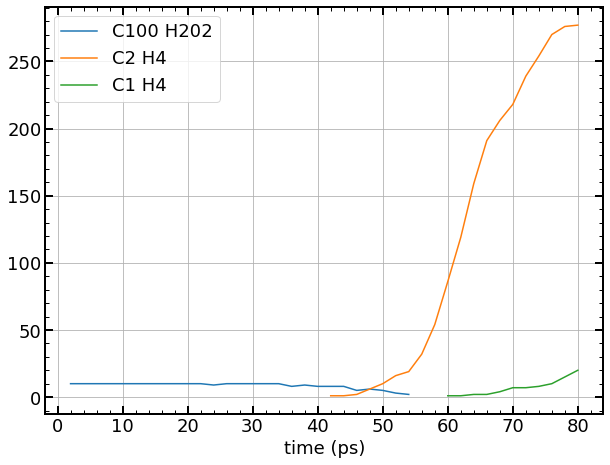

In [7]:
df = rs.data.assign(**{"time (ps)": rs.data.index * 1e-4})
df.plot(y=["C100 H202", "C2 H4", "C1 H4"], x="time (ps)")

## Look at proportions

The `get_proportions()` method, compute at each time step the percentage
of each molecule considering the number of one molecule over the total
number of molecules at this time step.

In [8]:
prop = rs.get_proportions()
prop.head()

No_moles  No_Specs  C100 H202  C15 H31  C85 H171  C14 H29  C33 H67  \
TimeStep                                                                       
20001           10         1      100.0      NaN       NaN      NaN      NaN   
40001           10         1      100.0      NaN       NaN      NaN      NaN   
60001           10         1      100.0      NaN       NaN      NaN      NaN   
80001           10         1      100.0      NaN       NaN      NaN      NaN   
100001          10         1      100.0      NaN       NaN      NaN      NaN   

          C67 H135  C86 H173  C100 H201  ...  C7 H12  C21 H44  C26 H53  \
TimeStep                                 ...                             
20001          NaN       NaN        NaN  ...     NaN      NaN      NaN   
40001          NaN       NaN        NaN  ...     NaN      NaN      NaN   
60001          NaN       NaN        NaN  ...     NaN      NaN      NaN   
80001          NaN       NaN        NaN  ...     NaN      NaN      NaN   
100001         NaN       NaN        NaN  ...     NaN      NaN      NaN   

          C6 H10  C6 H8  C7 H16  C23 H49  C6 H7  C6 H9  C9 H11  
TimeStep                                                        
20001        NaN    NaN     NaN      NaN    NaN    NaN     NaN  
40001        NaN    NaN     NaN      NaN    NaN    NaN     NaN  
60001        NaN    NaN     NaN      NaN    NaN    NaN     NaN  
80001        NaN    NaN     NaN      NaN    NaN    NaN     NaN  
100001       NaN    NaN     NaN      NaN    NaN    NaN     NaN  

[5 rows x 167 columns]

<AxesSubplot:xlabel='time (ps)'>

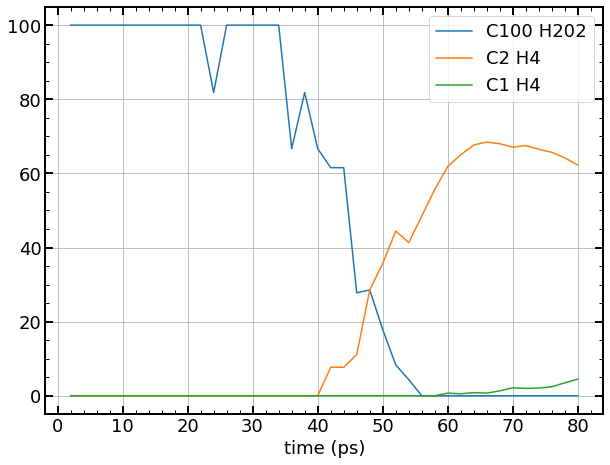

In [9]:
df = prop.assign(**{"time (ps)": prop.index * 1e-4})
df = df.fillna(value=0)
df.plot(y=["C100 H202", "C2 H4", "C1 H4"], x="time (ps)")

Get proportion only at the last time step.

In [10]:
rs.get_proportions(last=True)

Proportion
Species            
C2 H4     62.247191
C3 H6      6.966292
H2         4.719101
C1 H4      4.494382
C3 H5      3.370787
C2 H2      2.022472
C2 H6      1.797753
C3 H4      1.797753
C2 H3      1.797753
C4 H6      1.573034
C2 H5      1.123596
C1 H3      1.123596
C4 H8      0.898876
C5 H8      0.674157
C6 H12     0.674157
C7 H14     0.674157
C6 H10     0.674157
H1         0.449438
C4 H7      0.449438
C7 H13     0.224719
C4 H9      0.224719
C12 H25    0.224719
C5 H10     0.224719
C3 H8      0.224719
C5 H12     0.224719
C7 H12     0.224719
C10 H20    0.224719
C7 H16     0.224719
C6 H9      0.224719
C9 H11     0.224719

Only species with more than 4% at the last time step.

In [11]:
rs.get_proportions(last=True, minval=4)

Proportion
Species            
C2 H4     62.247191
C3 H6      6.966292
H2         4.719101
C1 H4      4.494382
H1         0.449438

Only species with more than 8% at a given time in the simulation.

In [12]:
rs.get_proportions(minval=8.)

No_moles  No_Specs   C100 H202   C15 H31  C85 H171   C14 H29  \
TimeStep                                                                 
20001           10         1  100.000000       NaN       NaN       NaN   
40001           10         1  100.000000       NaN       NaN       NaN   
60001           10         1  100.000000       NaN       NaN       NaN   
80001           10         1  100.000000       NaN       NaN       NaN   
100001          10         1  100.000000       NaN       NaN       NaN   
120001          10         1  100.000000       NaN       NaN       NaN   
140001          10         1  100.000000       NaN       NaN       NaN   
160001          10         1  100.000000       NaN       NaN       NaN   
180001          10         1  100.000000       NaN       NaN       NaN   
200001          10         1  100.000000       NaN       NaN       NaN   
220001          10         1  100.000000       NaN       NaN       NaN   
240001          11         3   81.818182  9.090909  9.090909       NaN   
260001          10         1  100.000000       NaN       NaN       NaN   
280001          10         1  100.000000       NaN       NaN       NaN   
300001          10         1  100.000000       NaN       NaN       NaN   
320001          10         1  100.000000       NaN       NaN       NaN   
340001          10         1  100.000000       NaN       NaN       NaN   
360001          12         5   66.666667       NaN       NaN  8.333333   
380001          11         3   81.818182       NaN       NaN  9.090909   
400001          12         5   66.666667       NaN       NaN  8.333333   
420001          13         6   61.538462       NaN       NaN  7.692308   
440001          13         6   61.538462       NaN       NaN  7.692308   
460001          18        10   27.777778       NaN       NaN  5.555556   
480001          21        11   28.571429       NaN       NaN  4.761905   
500001          28        14   17.857143       NaN       NaN  3.571429   
520001          36        17    8.333333       NaN       NaN       NaN   
540001          46        24    4.347826       NaN       NaN  2.173913   
560001          66        30         NaN       NaN       NaN       NaN   
580001          97        36         NaN  1.030928       NaN       NaN   
600001         139        41         NaN       NaN       NaN       NaN   
620001         183        41         NaN       NaN       NaN  1.639344   
640001         235        48         NaN       NaN       NaN       NaN   
660001         279        45         NaN       NaN       NaN       NaN   
680001         303        50         NaN  0.330033       NaN       NaN   
700001         325        50         NaN       NaN       NaN       NaN   
720001         354        49         NaN       NaN       NaN       NaN   
740001         382        44         NaN       NaN       NaN       NaN   
760001         411        42         NaN       NaN       NaN       NaN   
780001         430        42         NaN       NaN       NaN       NaN   
800001         445        37         NaN       NaN       NaN       NaN   

           C33 H67  C67 H135  C86 H173  C100 H201         H1      C2 H4  \
TimeStep                                                                  
20001          NaN       NaN       NaN        NaN        NaN        NaN   
40001          NaN       NaN       NaN        NaN        NaN        NaN   
60001          NaN       NaN       NaN        NaN        NaN        NaN   
80001          NaN       NaN       NaN        NaN        NaN        NaN   
100001         NaN       NaN       NaN        NaN        NaN        NaN   
120001         NaN       NaN       NaN        NaN        NaN        NaN   
140001         NaN       NaN       NaN        NaN        NaN        NaN   
160001         NaN       NaN       NaN        NaN        NaN        NaN   
180001         NaN       NaN       NaN        NaN        NaN        NaN   
200001         NaN       NaN       NaN        NaN        NaN        NaN   
2

## smoothing

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html

https://scipy.github.io/old-wiki/pages/Cookbook/SavitzkyGolay

Be careful with smoothing to not overinterpret minima and/or maxima or to 
introduce slopes that are not present in the data.

If you increase `window_length` you can increase the polyorder a little. 
Keep in mind that, for example, with a windows of length 5 (5 points) a 
polynomial of degree 4 fit exactly the 5 points. It always exists a polynomial 
of degree N - 1 that go through N points in a 2D space.

In [13]:
from scipy.signal import savgol_filter

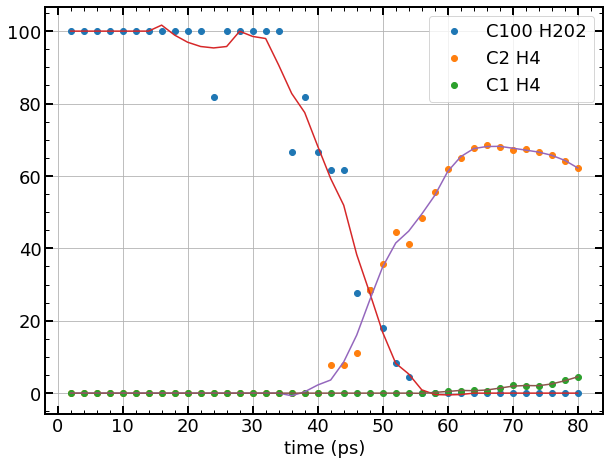

In [14]:
df = prop.assign(**{"time (ps)": prop.index * 1e-4})
df = df.fillna(value=0)

# plot
ax = df.plot(y=["C100 H202", "C2 H4", "C1 H4"], 
             x="time (ps)",
             ls="", marker="o", alpha=1)

# smooth
ax.plot(df["time (ps)"], savgol_filter(df["C100 H202"].values, window_length=9, polyorder=3))
ax.plot(df["time (ps)"], savgol_filter(df["C2 H4"].values, window_length=7, polyorder=3))
ax.plot(df["time (ps)"], savgol_filter(df["C1 H4"].values, window_length=5, polyorder=3))